# Here we go again...

In [38]:
from simpletransformers.language_representation import RepresentationModel
from simpletransformers.config.model_args import ModelArgs
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import random
import os
import re

In [25]:
def read_data(path): #input the path to the directory with data
    frames = []
    
    _, _, files = next(os.walk(path)) #create a list of all datafile names     
          
    for file in tqdm(files): #for every file in directory
        with open(path+"/"+file) as f: #read each file
            dataframe = pd.read_json(f) #convert file to dataframe
     
        frames.append(dataframe) #append each dataframe to list
    data = pd.concat(frames, sort=False) #make it one big dataframe
    
    return data, frames

In [26]:
data, data_list = read_data("scraped")

  0%|          | 0/31 [00:00<?, ?it/s]

In [34]:
# data = pd.read_json('scraped/data_10')
# data.head()
data_list[0].Body

pandas.core.series.Series

In [20]:
politiken = list(data[data.Domain == 'politiken.dk'].Body)[:1000] 
information = list(data[data.Domain == 'information.dk'].Body)[:1000]
ekstrabladet = list(data[data.Domain == 'ekstrabladet.dk'].Body)[:1000]
finans = list(data[data.Domain == 'finans.dk'].Body)[:1000]
berlingske = list(data[data.Domain == 'berlingske.dk'].Body)[:1000]
dr = list(data[data.Domain == 'dr.dk'].Body)[:1000]
tv2 = list(data[data.Domain == 'tv2.dk'].Body)[:1000]
version2 = list(data[data.Domain == 'version2.dk'].Body)[:1000]
bt = list(data[data.Domain == 'bt.dk'].Body)[:1000]
jyllandsposten = list(data[data.Domain == 'jyllands-posten.dk'].Body)[:1000]

len(politiken), len(information), len(ekstrabladet), len(finans), len(berlingske), len(dr), len(tv2), len(version2), len(bt), len(jyllandsposten)

(1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000)

In [21]:
politiken2 = list(data[data.Domain == 'politiken.dk'].Body)[:100] 
information2 = list(data[data.Domain == 'information.dk'].Body)[:100]
ekstrabladet2 = list(data[data.Domain == 'ekstrabladet.dk'].Body)[:100]
finans2 = list(data[data.Domain == 'finans.dk'].Body)[:100]
berlingske2 = list(data[data.Domain == 'berlingske.dk'].Body)[:100]
dr2 = list(data[data.Domain == 'dr.dk'].Body)[:100]
tv22 = list(data[data.Domain == 'tv2.dk'].Body)[:100]
version22 = list(data[data.Domain == 'version2.dk'].Body)[:100]
bt2 = list(data[data.Domain == 'bt.dk'].Body)[:100]
jyllandsposten2 = list(data[data.Domain == 'jyllands-posten.dk'].Body)[:100]


len(politiken2), len(information2),len(ekstrabladet2), len(finans2), len(berlingske2),len(dr2), len(tv22), len(version22), len(bt2), len(jyllandsposten2)

(100, 100, 100, 100, 100, 100, 100, 100, 100, 100)

## Encoding entire dataset

In [39]:
def remove_symbols(text):
    return re.sub('\W+',' ', text)

In [125]:
def encode_dataset(dataset, training_epochs=1): #input dataset as a list of dataframes
      
    model_args = ModelArgs(encoding="utf-8", manual_seed=42, num_train_epochs=training_epochs)

    print("Initializing Representation Model")
    model = RepresentationModel(
                model_type='bert',
                model_name='Maltehb/danish-bert-botxo',
                args=model_args,
                use_cuda=False)

    bodies = []
    authors = []
    domains = []
    
    for i, datafile in enumerate(tqdm(dataset)): #for each datafile
        
        body_list = list(datafile.Body)
        author_list = list(datafile.Byline)
        domain_list = list(datafile.Domain)
        header_list = list(datafile.Header)
        
        #save labels
        np.save(f"auto_encodings/authors_{i}", author_list)
        np.save(f"auto_encodings/domains_{i}", domain_list)
        np.save(f"auto_encodings/headers_{i}", header_list)
        
        clean_bodies = []
        
#         print(f"Cleaning bodies in datafile no. {i}")
        
        #clean bodies from punctuation and lowercase words
        for text in body_list: 
            text = remove_symbols(text)
            text = text.lower()
            clean_bodies.append(text)
            
        print(f"Encoding bodies in datafile no. {i}")
        
        #encode cleaned bodies
        word_vectors = model.encode_sentences(clean_bodies, combine_strategy='mean') 
  
        print(f"Saving encodings of datafile no. {i}") 
    
        #save encodings to file numbered with matching index of current datafile
        np.save(f"auto_encodings/encodings_{i}", word_vectors) 
        
    print("Data saved o/\o")
    
    return None #should save encodings and their labels (author, domain, header)

In [203]:
test_frames = []

for frame in data_list[:5]: 
    test_frames.append(frame[:200])
len(test_frames[0])

200

In [204]:
%%time
encode_dataset(test_frames)

Initializing Representation Model


Some weights of the model checkpoint at Maltehb/danish-bert-botxo were not used when initializing BertForTextRepresentation: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/5 [00:00<?, ?it/s]

Cleaning bodies in datafile no. 0
Encoding bodies in datafile no. 0
Saving encodings of datafile no. 0
Cleaning bodies in datafile no. 1
Encoding bodies in datafile no. 1
Saving encodings of datafile no. 1
Cleaning bodies in datafile no. 2
Encoding bodies in datafile no. 2
Saving encodings of datafile no. 2
Cleaning bodies in datafile no. 3
Encoding bodies in datafile no. 3
Saving encodings of datafile no. 3
Cleaning bodies in datafile no. 4
Encoding bodies in datafile no. 4
Saving encodings of datafile no. 4
Data saved o/\o
CPU times: total: 11min 36s
Wall time: 6min 20s


### Loading encodings from saved files

In [223]:
def load_autoencodings(path): 
    
    _,_, files = next(os.walk(path))

    encoding_arrays = []
    authors_labels = []
    domains_labels = []
    headers_labels = []
    
    for file in tqdm(files):
#         print(file)
        if 'encoding' in file: 
            encodings = np.load(path+'/'+file)
            encoding_arrays.append(encodings)
                
        if 'authors' in file: 
            authors = np.load(path+'/'+file)
            authors_labels.append(authors)
                
        if 'domains' in file: 
            domains = np.load(path+'/'+file)
            domains_labels.append(domains)
                
        if 'headers' in file: 
            headers = np.load(path+'/'+file)
            headers_labels.append(headers)
            
    encoding_arrays = np.concatenate(encoding_arrays, axis=0)
                
    return encoding_arrays, np.hstack(authors_labels), np.hstack(domains_labels), np.hstack(headers_labels)

In [224]:
encodings, authors, domains, headers = load_autoencodings("auto_encodings")       

  0%|          | 0/20 [00:00<?, ?it/s]

In [208]:
len(encodings), len(authors), len(domains), len(headers)

(1000, 1000, 1000, 1000)

## Classification

In [106]:
%%time
comb = politiken+information+ekstrabladet+finans+berlingske+dr+tv2+version2+bt+jyllandsposten
comb2 = politiken2+information2+ekstrabladet2+finans2+berlingske2+dr2+tv22+version22+bt2+jyllandsposten2


model_args = ModelArgs(encoding="utf-8", manual_seed=42, num_train_epochs=1)

model = RepresentationModel(
        model_type='bert',
        model_name='Maltehb/danish-bert-botxo',
        args=model_args,
        use_cuda=False)

word_vectors = model.encode_sentences(bodies, combine_strategy='mean')

Some weights of the model checkpoint at Maltehb/danish-bert-botxo were not used when initializing BertForTextRepresentation: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


CPU times: total: 1min 5s
Wall time: 38.3 s


In [107]:
word_vectors.shape

(100, 768)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [219]:
y = [0]*100 + [1]*100 + [2]*100 + [3]*100 + [4]*100 + [5]*100 + [6]*100
# y = [0]*1000 + [1]*1000 + [2]*1000 + [3]*1000 + [4]*1000 + [5]*1000 +[6]*1000

train_X, test_X, train_y, test_y = train_test_split(encodings, domains)
# test_y

In [220]:
rfc = RandomForestClassifier().fit(train_X, train_y)

In [221]:
rfc.score(test_X, test_y)

0.668

In [212]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import *

dum = DummyClassifier().fit(train_X, train_y)
dum.score(test_X, test_y)

0.184

In [15]:
import classifier_unit_test
import matplotlib.pyplot as plt

In [225]:
tpr_fpr = classifier_unit_test.test_classifier(rfc, train_X, test_X, train_y, test_y, give_roc=True)

Oh, model already fit. Thanks!
Training dummy...
Correctly predicted 167 of 250	Dummy: 120 of 250	:-)
Accuracy: 0.67			Dummy: 0.48	:-)
Balanced accuracy: 0.29		Dummy: 0.14	:-)
F1 score: 0.58			Dummy: 0.31	:-)
ROC AUC: 0.79			Dummy: 0.50	:-)

Output keys:
tpr
fpr
dum_tpr
dum_fpr


C:\Users\yasmi\anaconda3\envs\SimpleTransformers\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: `n_features_in_` is deprecated in 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


In [226]:
true_pos_rate = tpr_fpr["tpr"]
false_pos_rate = tpr_fpr["fpr"]
dum_tpr = tpr_fpr["dum_tpr"]
dum_fpr = tpr_fpr["dum_fpr"]

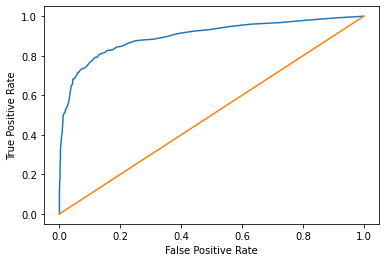

In [227]:
plt.plot(false_pos_rate, true_pos_rate)
plt.plot(dum_tpr,dum_fpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## Language Generation

In [23]:
from simpletransformers.language_modeling import LanguageModelingModel, LanguageModelingArgs
from simpletransformers.language_generation import LanguageGenerationModel

AttributeError: module 'wandb.sdk' has no attribute 'lib'

In [ ]:
model_args = LanguageModelingArgs()
model_args.reprocess_input_data = True
model_args.overwrite_output_dir = True
model_args.num_train_epochs = 1
model_args.dataset_type = "simple"

In [61]:
lm = LanguageModelingModel(
            model_type= 'bert', 
            model_name= 'Maltehb/danish-bert-botxo',
            use_cuda=False)

Some weights of the model checkpoint at Maltehb/danish-bert-botxo were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [67]:
lang_gen_model = LanguageGenerationModel(
                    model_type= 'gpt2', 
                    model_name='flax-community/dansk-gpt-wiki',
                    use_cuda=False)

Downloading:   0%|          | 0.00/825k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/830 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/487M [00:00<?, ?B/s]

In [71]:
lang_gen_model.generate("København er")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


['København er beliggende ved Sdr. Htk., 4 km vest for Frederikshavn, er det 40 ha store']

# Test the shit on codified

In [ ]:
codified = np.load('../../../codified.npy')
codified.shape

In [ ]:
text = list(data.Header.astype(str))
texts = text
final_text = ''
for text in tqdm(texts):
    text = text.strip()
    text = text.replace('\n','')
    text = text.replace('\r','')
    text = text.replace('\t','')
    if len(text) < 10:
        continue
    final_text += ''.join(text)
    final_text += '\n'
final_text = final_text[:-1]

headers = final_text.split('\n')

In [ ]:
politiken2_ind = []
information2_ind = []
politiken2 = []
information2 = []

for i, header in tqdm(enumerate(headers)):
    if header in politiken:
        politiken2_ind.append(i)
    elif header in information:
        information2_ind.append(i)
    
    if len(politiken2) == 1000 and len(information2)==1000:
        break

In [ ]:
politiken2_vecs = np.array([codified[i] for i in politiken2_ind])
information2_vecs = np.array([codified[i] for i in information2_ind][:992])
codified_vecs = np.vstack((politiken2_vecs, information2_vecs))

y = [0]*992 + [1]*992
train_X, test_X, train_y, test_y = train_test_split(codified_vecs, y)

In [ ]:
# random.shuffle(y)
# train_X, test_X, train_y, test_y = train_test_split(codified_vecs, y)

In [ ]:
import classifier_unit_test

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
classifier_unit_test.test_classifier(rfc, train_X, test_X, train_y, test_y)

In [ ]:
auc

# Generation test

In [37]:
#Make vector of some articles
bodies = list(data["Body"])[9000:9100]
headers = list(data["Header"])[9000:9100]

model = RepresentationModel(
        model_type='bert',
        model_name='Maltehb/danish-bert-botxo',
        use_cuda=False)

vectors = model.encode_sentences(bodies, combine_strategy='mean')
vectors.shape

Some weights of the model checkpoint at Maltehb/danish-bert-botxo were not used when initializing BertForTextRepresentation: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(100, 768)

In [30]:
train_data = [[vectors[i], headers[i]] for i in range(len(headers)-10)]
eval_data = [[vectors[i], headers[i]] for i in range(len(headers)-10, len(headers))]
train_df = pd.DataFrame(train_data, columns=["input", "target"])
eval_df = pd.DataFrame(eval_data, columns=["input", "target"])
train_df.head()

,input,target
0,"[-0.59563667, 0.46274945, 0.83595693, 0.591673...",Lettet Christinna Pedersen: 'Der har været for...
1,"[-0.3861792, 0.122922584, 0.9676417, -0.243358...",Ny museumsdirektør på kvindemuseet i Aarhus si...
2,"[-0.6130347, 0.15502118, 0.515855, 0.4008748, ...",Kulturministeren garanterer fans på stadion: '...
3,"[-0.38609523, 0.20278929, 0.98600316, 0.281827...",Debutanten Dolberg: Jeg kunne høre folk råbe p...
4,"[-0.7306787, 0.25296178, 1.0223695, 0.42101982...",Genoplev Danmarks vej til VM-finalen: Knusende...


In [39]:
from transformers import MarianMTModel, MarianTokenizer
import torch

tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-de")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-en-de")
embeddings = model.get_input_embeddings()

Downloading:   0%|          | 0.00/750k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/778k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/284M [00:00<?, ?B/s]